In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
col_nam = ['id', 'Clump Thickness', 'Uniformity of Cell Size', 
       'Uniformity of Cell Shape', 'Marginal Adhesion', 
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class']
path = r'/home/unknown/Downloads/100daysofmlcode-farhankarim/Data/Day 4 - KNN - Breast Cancer Wisconsin/breast-cancer-wisconsinclean.csv'
df = pd.read_csv(path,names=col_nam,header=None)

In [9]:
df.head() 

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [50]:
df.describe()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
id                             683 non-null int64
Clump Thickness                683 non-null int64
Uniformity of Cell Size        683 non-null int64
Uniformity of Cell Shape       683 non-null int64
Marginal Adhesion              683 non-null int64
Single Epithelial Cell Size    683 non-null int64
Bare Nuclei                    683 non-null object
Bland Chromatin                683 non-null int64
Normal Nucleoli                683 non-null int64
Mitoses                        683 non-null int64
Class                          683 non-null int64
dtypes: int64(10), object(1)
memory usage: 84.0+ KB


In [53]:
df.describe(include=object)

,Bare Nuclei
count,683
unique,10
top,1
freq,402


In [10]:
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [11]:
df['Bare Nuclei'].replace("?", np.NAN, inplace=True)
df = df.dropna()

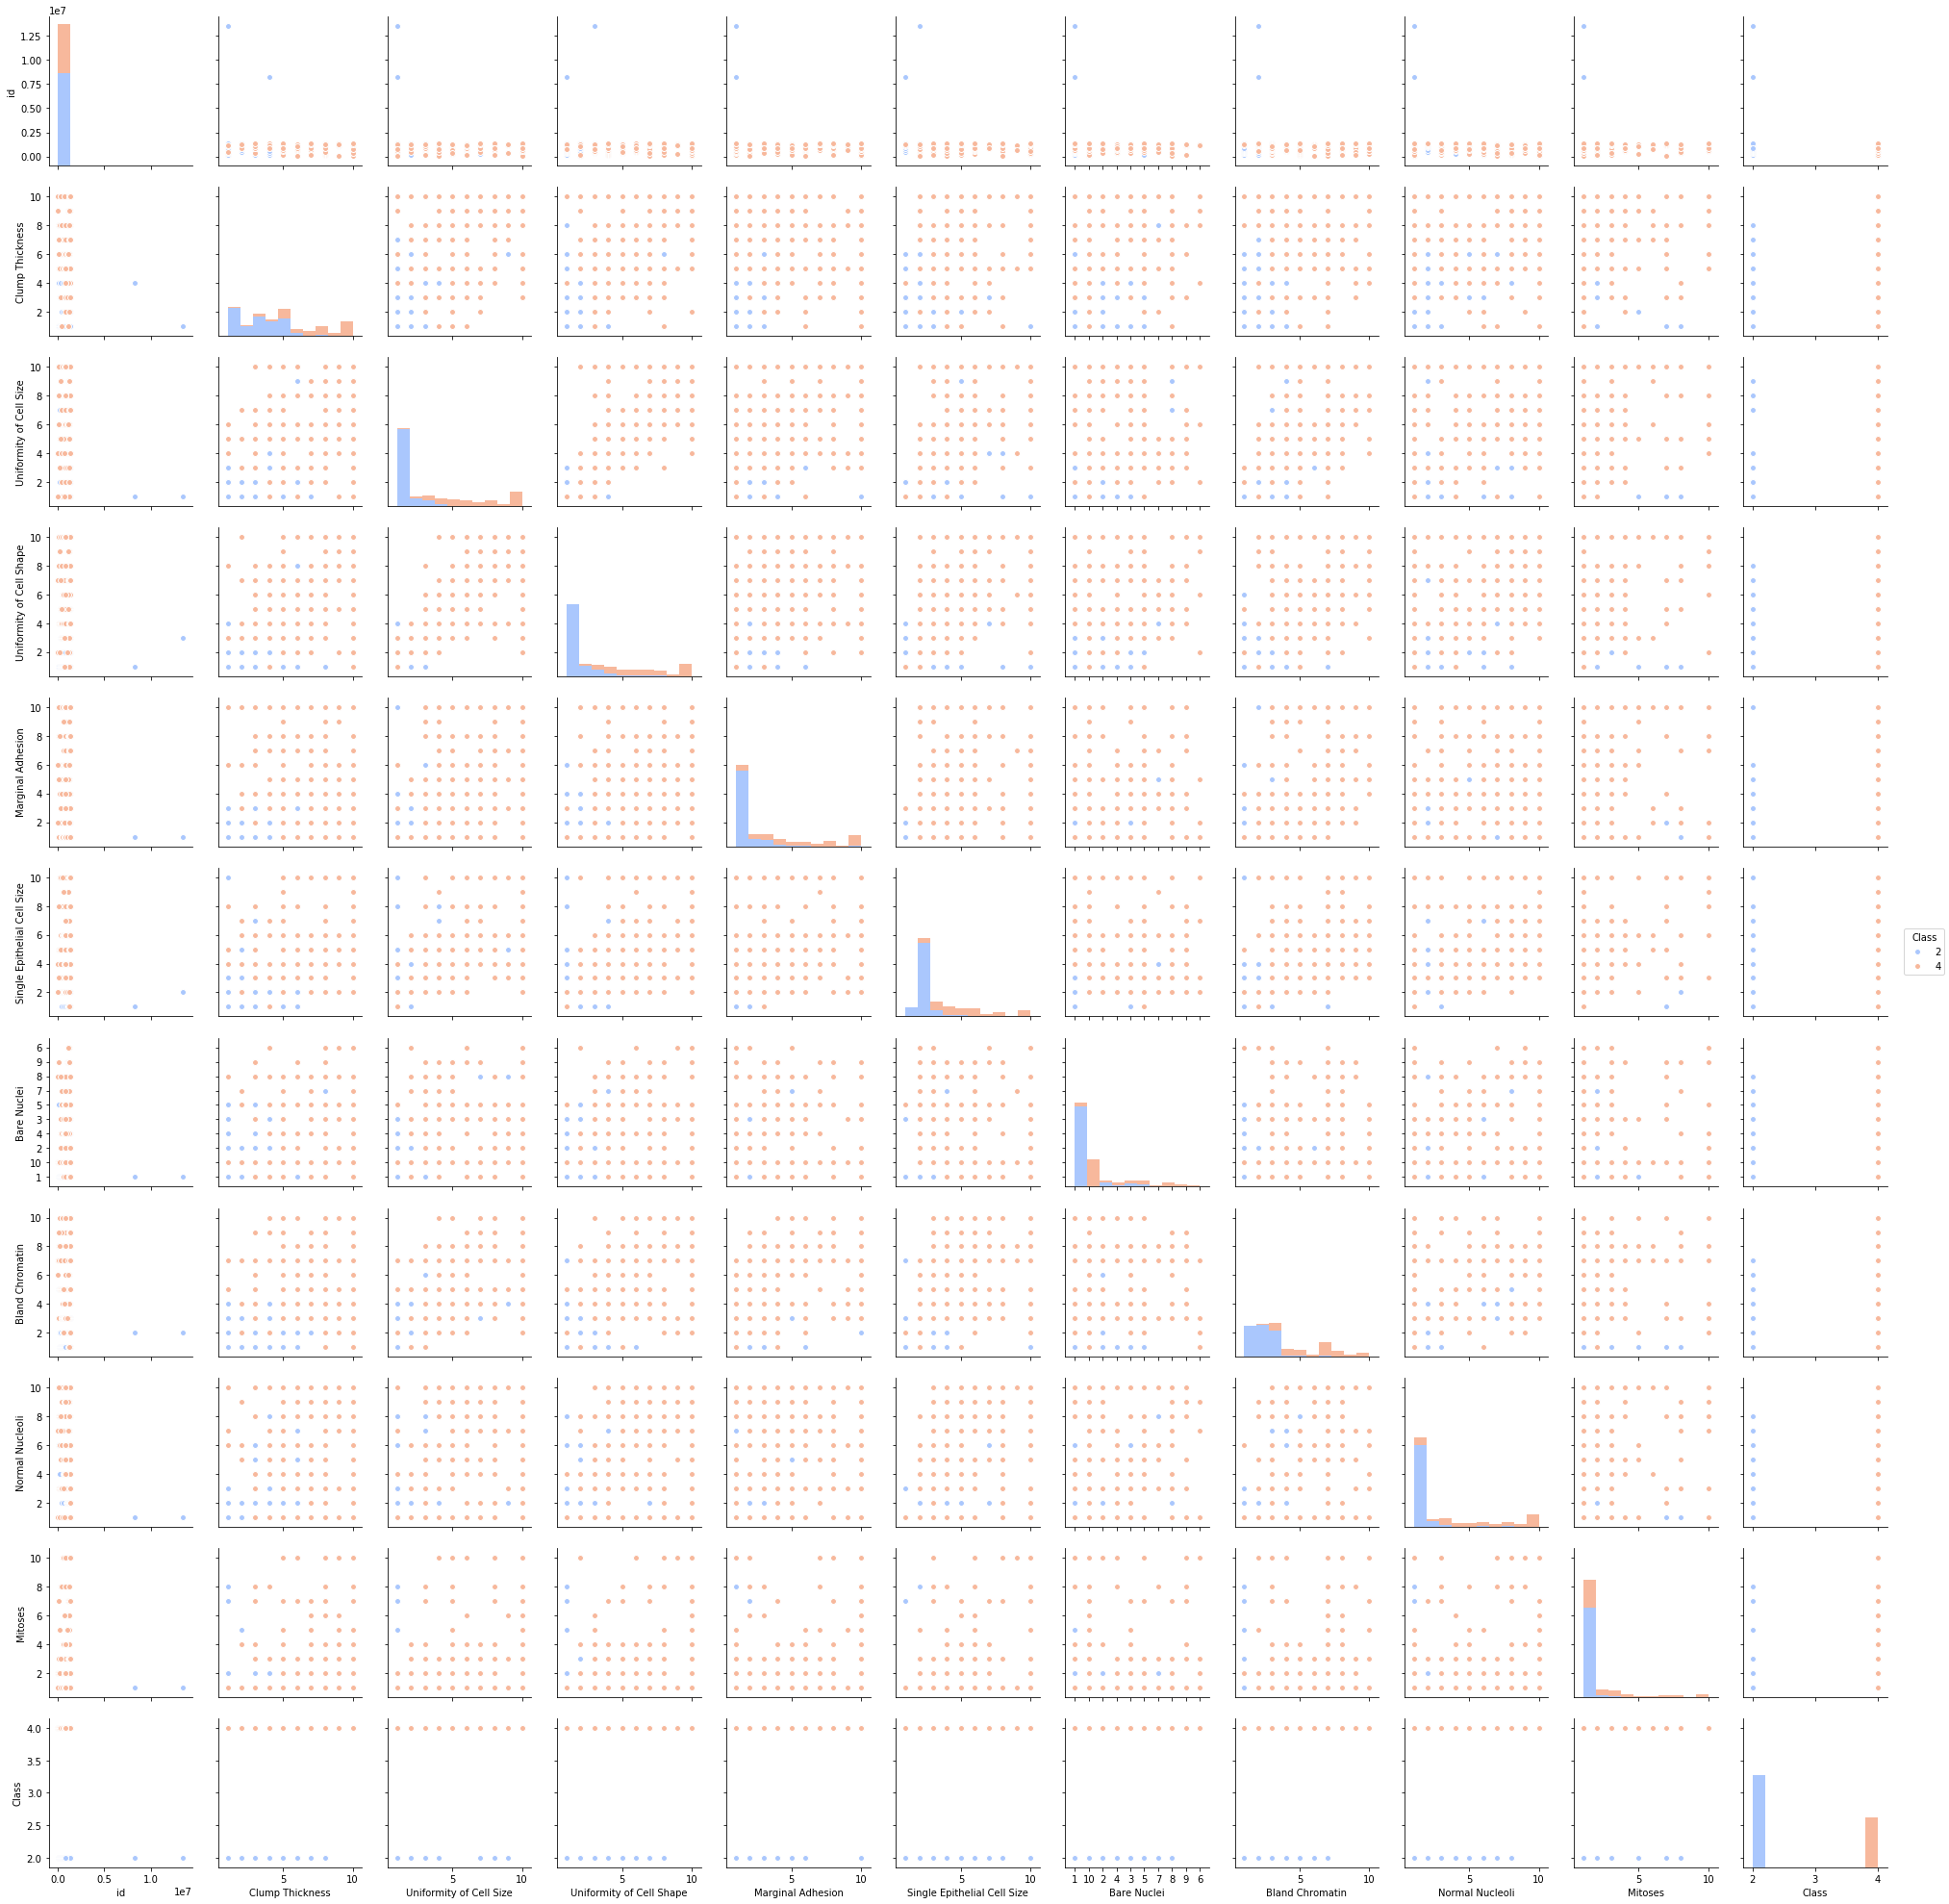

In [13]:
# THIS IS GOING TO BE A VERY LARGE PLOT
sns.pairplot(df,hue='Class',palette='coolwarm')

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(df.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
scaled_features = scaler.transform(df.drop('Class',axis=1))

In [18]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,-0.123664,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,-0.118956,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.098833,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,-0.097459,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.096256,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


In [19]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Class'],
                                                    test_size=0.30)

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [26]:
pred = knn.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [28]:
print(confusion_matrix(y_test,pred))

[[125   6]
 [  6  68]]


In [29]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          2       0.95      0.95      0.95       131
          4       0.92      0.92      0.92        74

avg / total       0.94      0.94      0.94       205



In [44]:
error_rate = []

# Will take some time
for i in range(1,100):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

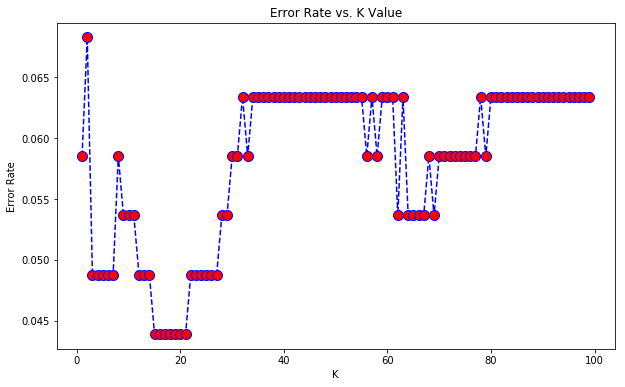

In [45]:
plt.figure(figsize=(10,6))
plt.plot(range(1,100),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [46]:
error_rate

[0.05853658536585366,
 0.06829268292682927,
 0.04878048780487805,
 0.04878048780487805,
 0.04878048780487805,
 0.04878048780487805,
 0.04878048780487805,
 0.05853658536585366,
 0.05365853658536585,
 0.05365853658536585,
 0.05365853658536585,
 0.04878048780487805,
 0.04878048780487805,
 0.04878048780487805,
 0.04390243902439024,
 0.04390243902439024,
 0.04390243902439024,
 0.04390243902439024,
 0.04390243902439024,
 0.04390243902439024,
 0.04390243902439024,
 0.04878048780487805,
 0.04878048780487805,
 0.04878048780487805,
 0.04878048780487805,
 0.04878048780487805,
 0.04878048780487805,
 0.05365853658536585,
 0.05365853658536585,
 0.05853658536585366,
 0.05853658536585366,
 0.06341463414634146,
 0.05853658536585366,
 0.06341463414634146,
 0.06341463414634146,
 0.06341463414634146,
 0.06341463414634146,
 0.06341463414634146,
 0.06341463414634146,
 0.06341463414634146,
 0.06341463414634146,
 0.06341463414634146,
 0.06341463414634146,
 0.06341463414634146,
 0.06341463414634146,
 0.0634146

In [64]:
# NOW WITH K=30
knn = KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=20


[[125   6]
 [  3  71]]


             precision    recall  f1-score   support

          2       0.98      0.95      0.97       131
          4       0.92      0.96      0.94        74

avg / total       0.96      0.96      0.96       205

